In [1]:
from google.colab import drive
drive.mount('/content/drive')


MessageError: Error: credential propagation was unsuccessful

Veuillez télécharger un fichier CSV


Saving Emploi.csv to Emploi.csv

Aperçu des données :
  code departement  ABCDE_H  ABCDE_F  ABCDE  ABC_FR  ABC_E  ABC_2649  \
0               01      196      199    395   245.0  107.0     235.0   
1               01      214      196    410   264.0  111.0     234.0   
2               01      235      208    443   264.0  127.0     253.0   
3               01      302      292    594   445.0   88.0     301.0   
4               01      308      302    610   441.0   89.0     306.0   

   ABC_DUR2  ABC_25    A_F  
0      66.0    55.0   90.0  
1      74.0    68.0   91.0  
2      70.0    59.0  116.0  
3      85.0   106.0  144.0  
4     102.0   105.0  135.0  

Types des colonnes :
code departement     object
ABCDE_H               int64
ABCDE_F               int64
ABCDE                 int64
ABC_FR              float64
ABC_E               float64
ABC_2649            float64
ABC_DUR2            float64
ABC_25              float64
A_F                 float64
dtype: object

Statistiques descripti

<Figure size 1500x1000 with 0 Axes>

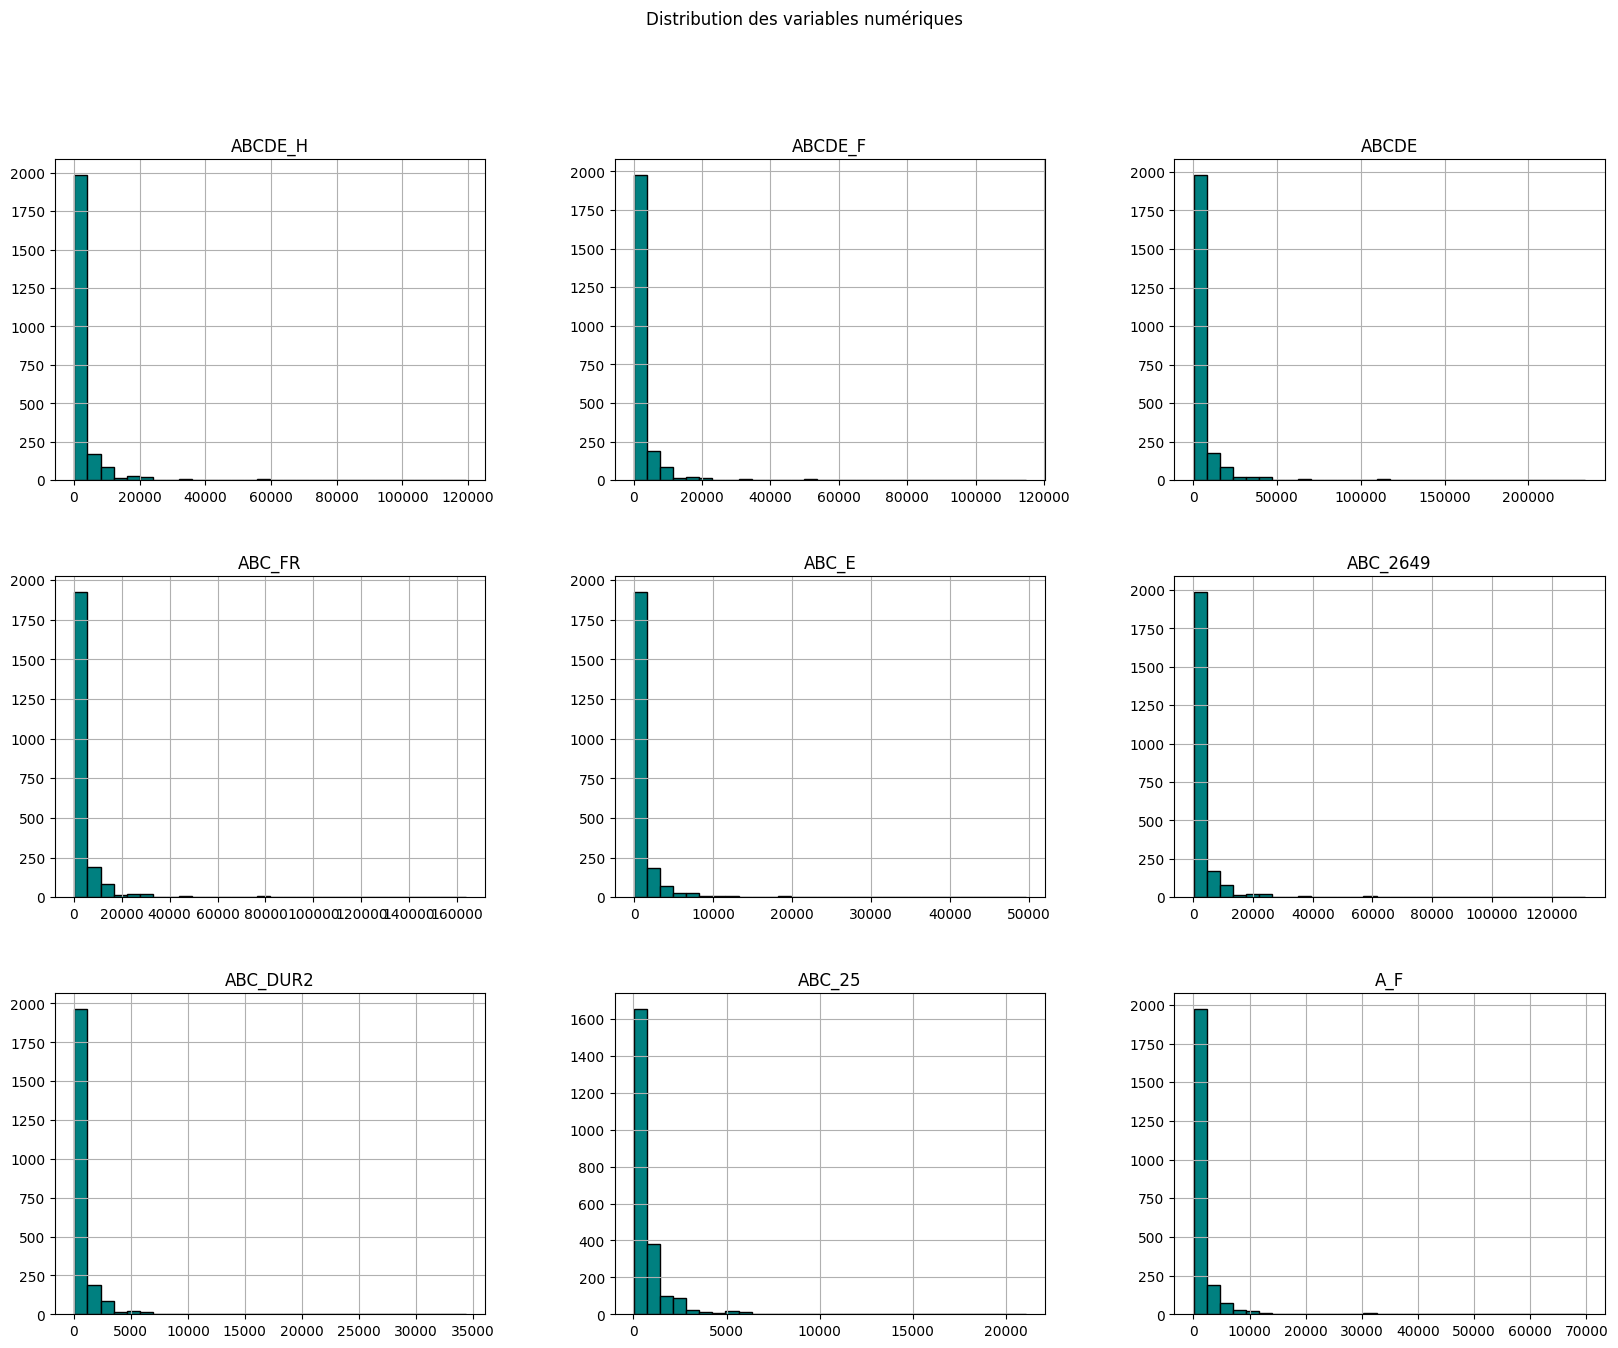

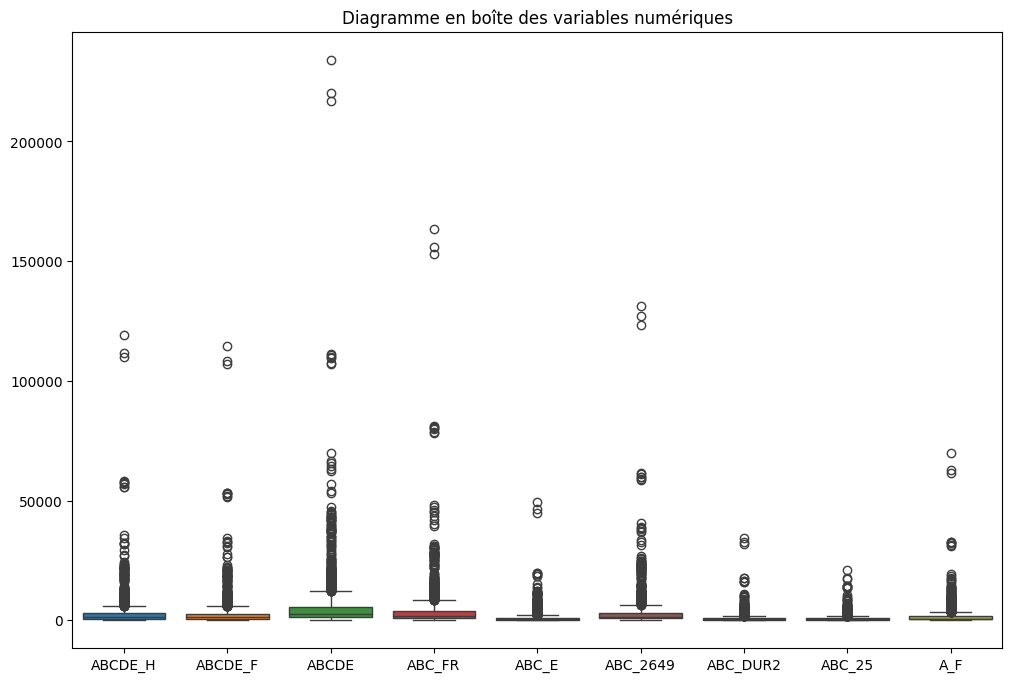

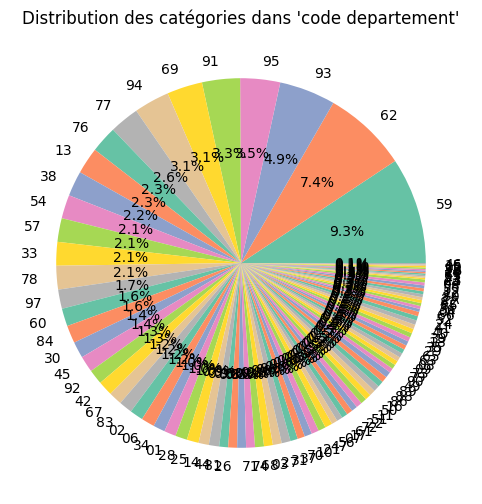

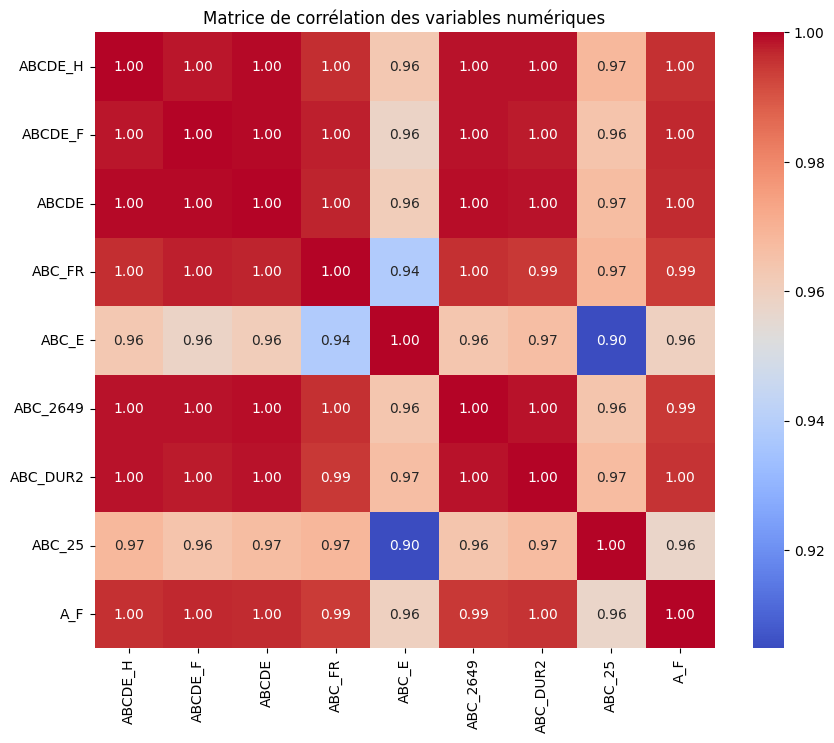


Attention : Certaines colonnes contiennent des valeurs manquantes.

Variables numériques détectées : ABCDE_H, ABCDE_F, ABCDE, ABC_FR, ABC_E, ABC_2649, ABC_DUR2, ABC_25, A_F
Variables catégorielles détectées : code departement


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Fonction pour analyser un fichier CSV
def analyze_csv():
    # Demander à l'utilisateur de télécharger un fichier CSV
    print("Veuillez télécharger un fichier CSV")
    uploaded = files.upload()  # Permet à l'utilisateur de télécharger un fichier

    # Lire le fichier CSV téléchargé
    filename = list(uploaded.keys())[0]  # Obtenir le nom du fichier téléchargé
    data = pd.read_csv(filename)

    # Afficher un aperçu des données
    print("\nAperçu des données :")
    print(data.head())

    # Afficher les types de données
    print("\nTypes des colonnes :")
    print(data.dtypes)

    # Étape 1 : Afficher des statistiques descriptives
    print("\nStatistiques descriptives :")
    print(data.describe())

    # Afficher les valeurs manquantes
    print("\nValeurs manquantes :")
    print(data.isnull().sum())

    # Étape 2 : Génération de graphiques

    # Visualisation des données numériques (Histogrammes)
    numerical_cols = data.select_dtypes(include=[np.number]).columns
    if len(numerical_cols) > 0:
        plt.figure(figsize=(15, 10))
        data[numerical_cols].hist(bins=30, figsize=(20, 15), color='teal', edgecolor='black')
        plt.suptitle("Distribution des variables numériques")
        plt.show()

    # Diagrammes en boîte pour les variables numériques
    if len(numerical_cols) > 0:
        plt.figure(figsize=(12, 8))
        sns.boxplot(data=data[numerical_cols])
        plt.title("Diagramme en boîte des variables numériques")
        plt.show()

    # Visualisation des données catégoriques (Diagrammes circulaires)
    categorical_cols = data.select_dtypes(exclude=[np.number]).columns
    if len(categorical_cols) > 0:
        for col in categorical_cols:
            plt.figure(figsize=(8, 6))
            data[col].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('Set2', len(data[col].unique())))
            plt.title(f"Distribution des catégories dans '{col}'")
            plt.ylabel('')  # Supprimer l'étiquette 'y'
            plt.show()

    # Matrice de corrélation pour les variables numériques
    if len(numerical_cols) > 0:
        plt.figure(figsize=(10, 8))
        sns.heatmap(data[numerical_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
        plt.title("Matrice de corrélation des variables numériques")
        plt.show()

    # Étape 3 : Afficher des messages d'explication selon les données
    if data.isnull().sum().any():
        print("\nAttention : Certaines colonnes contiennent des valeurs manquantes.")
    else:
        print("\nAucune valeur manquante détectée.")

    # Afficher les types de données détectés
    if len(numerical_cols) > 0:
        print(f"\nVariables numériques détectées : {', '.join(numerical_cols)}")
    if len(categorical_cols) > 0:
        print(f"Variables catégorielles détectées : {', '.join(categorical_cols)}")

# Appel de la fonction pour analyser le CSV
analyze_csv()

In [ ]:
# Importer les bibliothèques nécessaires
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import joblib
from google.colab import files

# Exemple de données fictives pour démonstration
# Remplacer cela par vos propres données
data = pd.DataFrame({
    'Feature1': np.random.rand(100),
    'Feature2': np.random.rand(100),
    'Feature3': np.random.rand(100),
    'Label': np.random.choice([0, 1], 100)
})

# Diviser les données en caractéristiques (X) et labels (y)
X = data[['Feature1', 'Feature2', 'Feature3']]
y = data['Label']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraîner le modèle
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Évaluer et afficher les résultats
y_pred = model.predict(X_test)
print("\nRapport de classification :")
print(classification_report(y_test, y_pred))

# Enregistrer et télécharger le modèle
model_filename = "mon_modele.pkl"
joblib.dump(model, model_filename)
print(f"\nModèle sauvegardé sous : {model_filename}")
files.download(model_filename)
